LOGISTIC REGRESSION MODEL

(75, 3) 

Checking the no of ones and zeroes, to check for imbalance
1    44
0    31
Name: Student admitted or not, dtype: int64

Confusion Matrix: 
 [[ 7  2]
 [ 2 14]]

Accuracy:  84.0 %

Precision:  0.875

Recall:  0.875


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


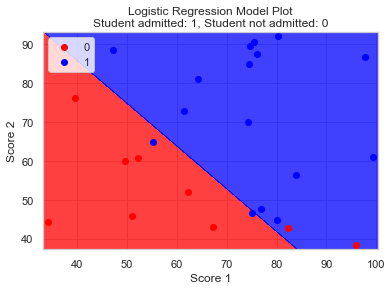

In [113]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression     # Importing the model to be used

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
train_data = pd.read_csv("admission_chances_train - Sheet1.csv", header=0)
test_data = pd.read_csv("admission_chances_test - Sheet1.csv", header=0)
train_data = train_data.dropna()    # Removes missing rows, if any present


print(train_data.shape, "\n")  # Returns tuple of (rows, columns)

print("Checking the no of ones and zeroes, to check for imbalance")
print(train_data['Student admitted or not'].value_counts(0)) 


x = train_data.iloc[:, [0, 1]].values  # input, train data

y = train_data.iloc[:, 2].values   # output, train data

x1 = test_data.iloc[:, [0, 1]].values   # input, test data

y1 = test_data.iloc[:, 2].values   # output, test data

lr = LogisticRegression(random_state=0)

lr.fit(x, y)    # Training the model

y_pred1 = lr.predict(x1)    # Using model for prediction

from sklearn.metrics import confusion_matrix   # Obtaining the confusion matrix
cm1 = confusion_matrix(y1, y_pred1)
print("\nConfusion Matrix: \n", cm1)

from sklearn.metrics import accuracy_score   # Accuracy
A1=accuracy_score(y1, y_pred1)
print("\nAccuracy: ", 100*A1, "%")

from sklearn.metrics import precision_score   # Precision
P1=precision_score(y1, y_pred1)
print("\nPrecision: ", P1)

from sklearn.metrics import recall_score   # Recall
R1=recall_score(y1, y_pred1)
print("\nRecall: ", R1)


from matplotlib.colors import ListedColormap     # Graphing the LR model

X_set, y_set = x1, y1
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, lr.predict(
    np.array([X1.ravel(), X2.ravel()]).T).reshape(
    X1.shape), alpha=0.75, cmap=ListedColormap(('red', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'blue'))(i), label=j)

plt.title('Logistic Regression Model Plot\n'
          'Student admitted: 1, Student not admitted: 0')
plt.xlabel('Score 1')
plt.ylabel('Score 2')
plt.legend()
plt.show()

SUPPORT VECTOR MACHINE MODEL


Confusion Matrix: 
 [[ 7  2]
 [ 1 15]]

Accuracy:  88.0 %

Precision:  0.8823529411764706

Recall:  0.9375

 The margin separating hyperplane plot. Students admitted are represented in pink, those not admitted are in blue.
 x-axis represents Score 1, y-axis is Score 2


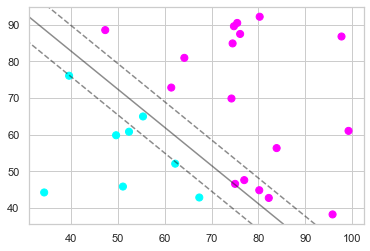

In [112]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn import svm             # Importing the model to be used

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
train_data = pd.read_csv("admission_chances_train - Sheet1.csv", header=0)
test_data = pd.read_csv("admission_chances_test - Sheet1.csv", header=0)
train_data = train_data.dropna()

x = train_data.iloc[:, [0, 1]].values  # input, train data

y = train_data.iloc[:, 2].values   # output, train data

x1 = test_data.iloc[:, [0, 1]].values   # input, test data

y1 = test_data.iloc[:, 2].values   # output, test data

clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(x, y)   # Training the model

y_pred2 = clf.predict(x1)   # Using model for prediction

from sklearn.metrics import confusion_matrix     # Confusion matrix
cm2 = confusion_matrix(y1, y_pred2)
print("\nConfusion Matrix: \n", cm2)

from sklearn.metrics import accuracy_score   # Accuracy
A2=accuracy_score(y1, y_pred2)
print("\nAccuracy: ", 100*A2, "%")

from sklearn.metrics import precision_score   # Precision
P2=precision_score(y1, y_pred2)
print("\nPrecision: ", P2)

from sklearn.metrics import recall_score   # Recall
R2=recall_score(y1, y_pred2)
print("\nRecall: ", R2)

def plot_hyperplane(model, ax=None, plot_support=True):     # Plotting a margin separating hyperplane
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x3 = np.linspace(xlim[0], xlim[1], 30)    # create grid to evaluate model
    y3 = np.linspace(ylim[0], ylim[1], 30)
    y_pred2, x1 = np.meshgrid(y3, x3)
    xy = np.vstack([x1.ravel(), y_pred2.ravel()]).T
    P = model.decision_function(xy).reshape(x1.shape)

    ax.contour(x1, y_pred2, P, colors='k',      # plot decision boundary and margins
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    if plot_support:                             # plot support vectors
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.show()

plt.scatter(x1[:, 0], x1[:, 1], c=y_pred2, s=50, cmap='cool')
print("\n The margin separating hyperplane plot. Students admitted are represented in pink, those not admitted are in blue.\n",
"x-axis represents Score 1, y-axis is Score 2")
plot_hyperplane(clf)



DECISION TREE MODEL

In [111]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.tree import DecisionTreeClassifier           # Importing the model to be used

x = train_data.iloc[:, [0, 1]].values  # input, train data

y = train_data.iloc[:, 2].values   # output, train data

x1 = test_data.iloc[:, [0, 1]].values   # input, test data

y1 = test_data.iloc[:, 2].values   # output, test data

dt = DecisionTreeClassifier(random_state=0)

dt.fit(x, y)   # Training the model

y_pred3=dt.predict(x1)    # Using model for prediction

from sklearn.metrics import confusion_matrix     # Confusion matrix
cm3 = confusion_matrix(y1, y_pred3)
print("\nConfusion Matrix: \n", cm3)

from sklearn.metrics import accuracy_score   # Accuracy
A3=accuracy_score(y1, y_pred3)
print("\nAccuracy: ", 100*A3, "%")
 
    
from sklearn.metrics import precision_score   # Precision
P3=precision_score(y1, y_pred3)
print("\nPrecision: ", P3)

from sklearn.metrics import recall_score   # Recall
R3=recall_score(y1, y_pred3)
print("\nRecall: ", R3)


Confusion Matrix: 
 [[ 8  1]
 [ 2 14]]

Accuracy:  88.0 %

Precision:  0.9333333333333333

Recall:  0.875


RANDOM FOREST MODEL

In [109]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.ensemble import RandomForestClassifier        # Importing the model to be used

x = train_data.iloc[:, [0, 1]].values  # input, train data

y = train_data.iloc[:, 2].values   # output, train data

x1 = test_data.iloc[:, [0, 1]].values   # input, test data

y1 = test_data.iloc[:, 2].values   # output, test data

rf = RandomForestClassifier(n_estimators = 1000, random_state = 0)

rf.fit(x, y)   # Training the model

y_pred4 = rf.predict(x1)    # Using model for prediction

from sklearn.metrics import confusion_matrix     # Confusion matrix
cm4 = confusion_matrix(y1, y_pred4)
print("\nConfusion Matrix: \n", cm4)

from sklearn.metrics import accuracy_score   # Accuracy
A4 = accuracy_score(y1, y_pred4)
print("\nAccuracy: ", 100*A4, "%")

from sklearn.metrics import precision_score   # Precision
P4=precision_score(y1, y_pred4)
print("\nPrecision: ", P4)

from sklearn.metrics import recall_score   # Recall
R4=recall_score(y1, y_pred4)
print("\nRecall: ", R4)


Confusion Matrix: 
 [[ 9  0]
 [ 2 14]]

Accuracy:  92.0 %

Precision:  1.0

Recall:  0.875


NEURAL NETWORK MODEL

In [41]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.neural_network import MLPClassifier        # Importing the model to be used

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
train_data = pd.read_csv("admission_chances_train - Sheet1.csv", header=0)
test_data = pd.read_csv("admission_chances_test - Sheet1.csv", header=0)

x = train_data.iloc[:, [0, 1]].values  # input, train data

y = train_data.iloc[:, 2].values   # output, train data

x1 = test_data.iloc[:, [0, 1]].values   # input, test data

y1 = test_data.iloc[:, 2].values   # output, test data

NN = MLPClassifier(solver='lbfgs', activation='relu', alpha=1e-5, hidden_layer_sizes=(3, 5), random_state=0) # L-BFGS optimisation algorithm is 
                                                                                          #best for small datasets
NN.fit(x, y)   # Training the model

y_pred5 = NN.predict(x1)    # Using model for prediction

from sklearn.metrics import confusion_matrix     # Confusion matrix
cm5 = confusion_matrix(y1, y_pred5)
print("Confusion Matrix: \n", cm5)

from sklearn.metrics import accuracy_score   # Accuracy
A5=accuracy_score(y1, y_pred5)
print("\nAccuracy:", 100*A5, "%")

from sklearn.metrics import precision_score   # Precision
P5=precision_score(y1, y_pred5)
print("\nPrecision: ", P5)

from sklearn.metrics import recall_score   # Recall
R5=recall_score(y1, y_pred5)
print("\nRecall: ", R5)

Confusion Matrix: 
 [[ 8  1]
 [ 0 16]]

Accuracy: 96.0 %

Precision:  0.9411764705882353

Recall:  1.0


COMPARING THE MODELS

In [87]:
from tabulate import tabulate

print("\n", tabulate([['Logistic Regression', "84%"], ['Support Vector Machine', "88%"], ['Decision Tree Classifier', "88%"],
        ['Random Forest Classifier', "92%"], ['Neural Network', "64%"]], headers=['Model used', 'Accuracy of the model']), "\n")
print("\nFrom the table we see that the Random Forest Classifier model gave results with the greatest accuracy,\n"
      "while the Neural Network model performed the worst among the 5 models used.\n", "Since there isn't much imbalance in given data, Accuracy is a good metric for comparing the models.")


 Model used                Accuracy of the model
------------------------  -----------------------
Logistic Regression       84%
Support Vector Machine    88%
Decision Tree Classifier  88%
Random Forest Classifier  92%
Neural Network            64% 


From the table we see that the Random Forest Classifier model gave results with the greatest accuracy,
while the Neural Network model performed the worst among the 5 models used.
 Since there isn't much imbalance in given data, Accuracy is a good metric for comparing the models.
